In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [12]:
#read in the data
df = pd.read_csv('../../data/city_Shooting.csv')

In [13]:
df.head()

,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,Ederson,br BRA,GK,29-053,9.0,0,0,0,NaN,0.00,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
1,Erling Haaland,no NOR,FW,22-080,8.3,15,38,20,52.6,4.55,...,10.9,0,1,1,9.0,8.2,0.22,6.0,5.8,Matches
2,João Cancelo,pt POR,DF,28-135,8.2,2,9,2,22.2,1.10,...,22.3,0,0,0,0.3,0.3,0.04,1.7,1.7,Matches
3,Phil Foden,eng ENG,FW,22-134,7.3,6,20,12,60.0,2.74,...,12.1,0,0,0,3.5,3.5,0.17,2.5,2.5,Matches
4,Kevin De Bruyne,be BEL,MF,31-103,7.6,1,22,7,31.8,2.91,...,20.9,2,0,0,1.5,1.5,0.07,-0.5,-0.5,Matches


In [14]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [15]:
df.Player.unique()

array(['Ederson', 'Erling Haaland', 'João Cancelo', 'Phil Foden',
       'Kevin De Bruyne', 'Rodri', 'Rúben Dias', 'Bernardo Silva',
       'Kyle Walker', 'İlkay Gündoğan', 'John Stones', 'Nathan Aké',
       'Jack Grealish', 'Riyad Mahrez', 'Manuel Akanji', 'Julián Álvarez',
       'Sergio Gómez', 'Cole Palmer', 'Rico Lewis', 'Aymeric Laporte',
       'Kalvin Phillips'], dtype=object)

In [16]:
df = df[(df['Player']=='Jack Grealish')].reset_index()

In [17]:
df

,index,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,12,Jack Grealish,eng ENG,FW,27-029,3.5,1,5,2,40.0,...,14.2,0,0,0,0.8,0.8,0.16,0.2,0.2,Matches


In [18]:
df = df.drop(['index','Nation','Pos','Age','90s','FK','PK','PKatt','Matches'],axis=1)

In [19]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Jack Grealish,1,5,2,40.0,1.42,0.57,0.2,0.5,14.2,0.8,0.8,0.16,0.2,0.2


In [20]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [31]:
#add ranges to list of tuple pairs
ranges = []
b_values = []

for x in params:
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Jack Grealish':
        b_values = df.iloc[x].values.tolist()
        
b_values = b_values[1:]

values = b_values

In [35]:
values

[1, 5, 2, 40.0, 1.42, 0.57, 0.2, 0.5, 14.2, 0.8, 0.8, 0.16, 0.2, 0.2]

In [36]:
#title 
title = dict(
  title_name='Jack Grealish',
  title_color='#3282b8',
  subtitle_name="Man City",
  subtitle_color='#ABCDEF',
  title_fontsize=18,
  subtitle_fontsize=15
)

endnote = '@cityzens\ndata via FBREF / Statsbomb'

TypeError: 'float' object is not subscriptable

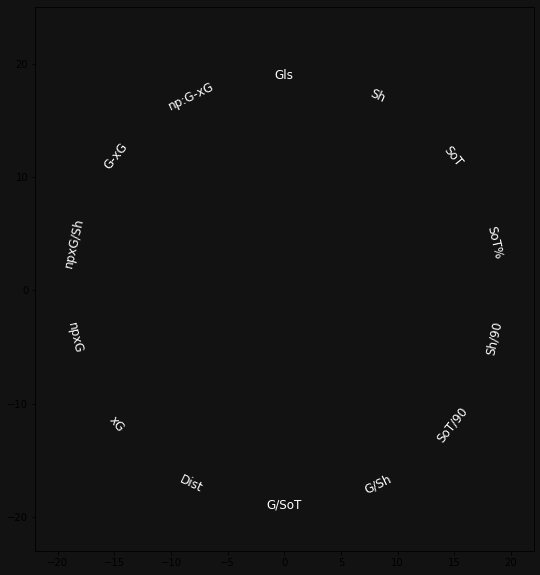

In [39]:
radar = Radar(
  label_fontsize=12,
  range_fontsize=7.5,
  background_color="#121212",
  patch_color="#28252C",
  label_color="#FFFFFF",
  range_color="#FFFFFF"
)

fig,ax = radar.plot_radar(
  ranges=ranges,
  params=params,
  values=values,
  radar_color=['#3282b8'],
  alphas=[.75],
  title=title,
  image='../../images/mancitylogo.png',
  image_coord=[0.04, 0.1],
  compare=False,
  filename="../../output/Radars/shooting.jpg",
  endnote=endnote,
)